In [1]:
print("Phan Đức An - 6351071001")

Phan Đức An - 6351071001


## Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

## Nhập dữ liệu

In [3]:
# Đọc dữ liệu Mushroom
data = pd.read_csv('datasets/mushrooms.csv')

print("Thông tin dữ liệu Mushroom:")
print(f"Số lượng dữ liệu: {len(data)}")
print(f"Số lượng cột: {len(data.columns)}")
print("\nThông tin chi tiết:")
print(data.info())
print("\nMẫu dữ liệu:")
display(data.head(10))

Thông tin dữ liệu Mushroom:
Số lượng dữ liệu: 8124
Số lượng cột: 23

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   o

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
# Kiểm tra giá trị thiếu
print("Kiểm tra giá trị thiếu:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Không có giá trị thiếu trong dữ liệu.")

# Kiểm tra giá trị '?' (thường được dùng thay cho missing values)
print("\nKiểm tra ký tự '?' trong dữ liệu:")
for col in data.columns:
    question_count = (data[col] == '?').sum()
    if question_count > 0:
        print(f"  {col}: {question_count} giá trị '?'")

Kiểm tra giá trị thiếu:
Series([], dtype: int64)
Không có giá trị thiếu trong dữ liệu.

Kiểm tra ký tự '?' trong dữ liệu:
  stalk-root: 2480 giá trị '?'



Phân bố class (e: edible/ăn được, p: poisonous/độc):
class
e    4208
p    3916
Name: count, dtype: int64

Tỷ lệ:
class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


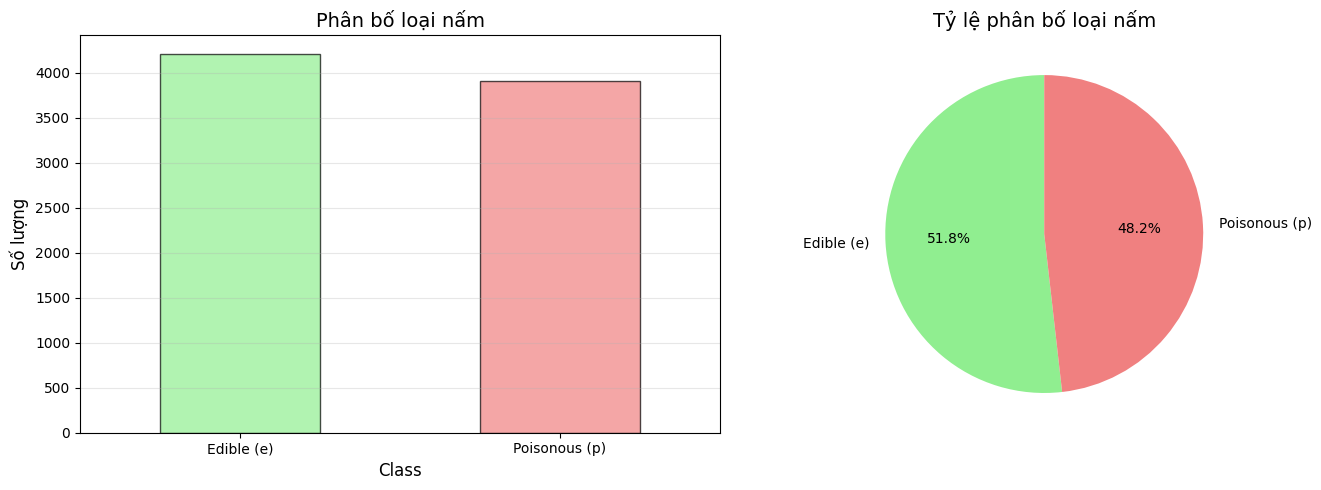

In [5]:
# Phân bố của thuộc tính quyết định 'class'
print("\nPhân bố class (e: edible/ăn được, p: poisonous/độc):")
print(data['class'].value_counts())
print(f"\nTỷ lệ:")
print(data['class'].value_counts(normalize=True))

# Vẽ biểu đồ phân bố class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột
class_counts = data['class'].value_counts()
colors = ['lightgreen' if x == 'e' else 'lightcoral' for x in class_counts.index]
class_counts.plot(kind='bar', ax=axes[0], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Phân bố loại nấm', fontsize=14)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_xticklabels(['Edible (e)', 'Poisonous (p)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Biểu đồ tròn
class_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                   labels=['Edible (e)', 'Poisonous (p)'],
                   colors=['lightgreen', 'lightcoral'],
                   startangle=90)
axes[1].set_title('Tỷ lệ phân bố loại nấm', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [6]:
# Kiểm tra các giá trị unique trong mỗi cột
print("\nSố lượng giá trị unique trong mỗi cột:")
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"  {col}: {unique_count} giá trị unique")
    if unique_count <= 10:
        print(f"    -> {data[col].unique().tolist()}")


Số lượng giá trị unique trong mỗi cột:
  class: 2 giá trị unique
    -> ['p', 'e']
  cap-shape: 6 giá trị unique
    -> ['x', 'b', 's', 'f', 'k', 'c']
  cap-surface: 4 giá trị unique
    -> ['s', 'y', 'f', 'g']
  cap-color: 10 giá trị unique
    -> ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
  bruises: 2 giá trị unique
    -> ['t', 'f']
  odor: 9 giá trị unique
    -> ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
  gill-attachment: 2 giá trị unique
    -> ['f', 'a']
  gill-spacing: 2 giá trị unique
    -> ['c', 'w']
  gill-size: 2 giá trị unique
    -> ['n', 'b']
  gill-color: 12 giá trị unique
  stalk-shape: 2 giá trị unique
    -> ['e', 't']
  stalk-root: 5 giá trị unique
    -> ['e', 'c', 'b', 'r', '?']
  stalk-surface-above-ring: 4 giá trị unique
    -> ['s', 'f', 'k', 'y']
  stalk-surface-below-ring: 4 giá trị unique
    -> ['s', 'f', 'y', 'k']
  stalk-color-above-ring: 9 giá trị unique
    -> ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']
  stalk-color-below-ring: 9 giá tr

## Chia dữ liệu thành tập huấn luyện (70%) và kiểm thử (30%)

In [8]:
# Chia dữ liệu thành train (70%) và test (30%)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['class'])

print(f"Kích thước dữ liệu huấn luyện: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%)")
print(f"Kích thước dữ liệu kiểm thử: {len(test_data)} ({len(test_data)/len(data)*100:.1f}%)")
print(f"\nPhân bố class trong tập huấn luyện:")
print(train_data['class'].value_counts())
print(f"\nPhân bố class trong tập kiểm thử:")
print(test_data['class'].value_counts())

Kích thước dữ liệu huấn luyện: 5686 (70.0%)
Kích thước dữ liệu kiểm thử: 2438 (30.0%)

Phân bố class trong tập huấn luyện:
class
e    2945
p    2741
Name: count, dtype: int64

Phân bố class trong tập kiểm thử:
class
e    1263
p    1175
Name: count, dtype: int64


In [9]:
# Lưu lại kích thước để tách sau này
train_size = len(train_data)
test_size = len(test_data)

# Nối lại dữ liệu để xử lý đồng bộ
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
print(f"Kích thước dữ liệu sau khi nối: {len(combined_data)}")

Kích thước dữ liệu sau khi nối: 8124


## Câu 3: Khảo sát dữ liệu
Lưu ý: Vì tất cả các cột đều là categorical, không thể tính Pearson correlation. Ta sẽ chuyển sang bước tiếp theo.

In [10]:
# Kiểm tra kiểu dữ liệu của các cột
print("Kiểu dữ liệu các cột:")
print(combined_data.dtypes)
print("\nTất cả các cột đều là categorical (object), không thể tính Pearson correlation.")
print("Sẽ chuyển đổi tất cả về dạng one-hot encoding ở bước tiếp theo.")

Kiểu dữ liệu các cột:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Tất cả các cột đều là categorical (object), không thể tính Pearson correlation.
Sẽ chuyển đổi tất cả về dạng one-hot encoding ở bước tiếp theo.


## Câu 4: Tách features và labels

In [11]:
# Tách thuộc tính quyết định 'class' ra khỏi dữ liệu
features = combined_data.drop('class', axis=1)
labels = combined_data['class']

print(f"Kích thước features: {features.shape}")
print(f"Kích thước labels: {labels.shape}")
print(f"\nCác cột trong features ({len(features.columns)} cột):\n{features.columns.tolist()}")
print(f"\nPhân bố labels:\n{labels.value_counts()}")

Kích thước features: (8124, 22)
Kích thước labels: (8124,)

Các cột trong features (22 cột):
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Phân bố labels:
class
e    4208
p    3916
Name: count, dtype: int64


## Câu 5: Chuyển đổi về dạng One-Hot Vector

In [12]:
# Xác định các cột categorical
categorical_cols = features.select_dtypes(include=['object']).columns
print(f"Số lượng cột categorical cần chuyển đổi: {len(categorical_cols)}")
print(f"\nCác cột categorical: {categorical_cols.tolist()[:10]}...") # Hiển thị 10 cột đầu

# Lưu số lượng cột ban đầu
num_cols_before = features.shape[1]
print(f"\nSố lượng cột trước khi encoding: {num_cols_before}")

Số lượng cột categorical cần chuyển đổi: 22

Các cột categorical: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape']...

Số lượng cột trước khi encoding: 22


In [13]:
# Chuyển đổi các cột categorical về dạng one-hot vector
features = pd.get_dummies(features, columns=categorical_cols)

num_cols_after = features.shape[1]
print(f"Số lượng cột sau khi encoding: {num_cols_after}")
print(f"Số cột đã tăng thêm: {num_cols_after - num_cols_before}")
print(f"\nKích thước features sau encoding: {features.shape}")
print(f"\nMột số cột đầu tiên sau encoding:\n{features.columns[:20].tolist()}")

Số lượng cột sau khi encoding: 117
Số cột đã tăng thêm: 95

Kích thước features sau encoding: (8124, 117)

Một số cột đầu tiên sau encoding:
['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y']


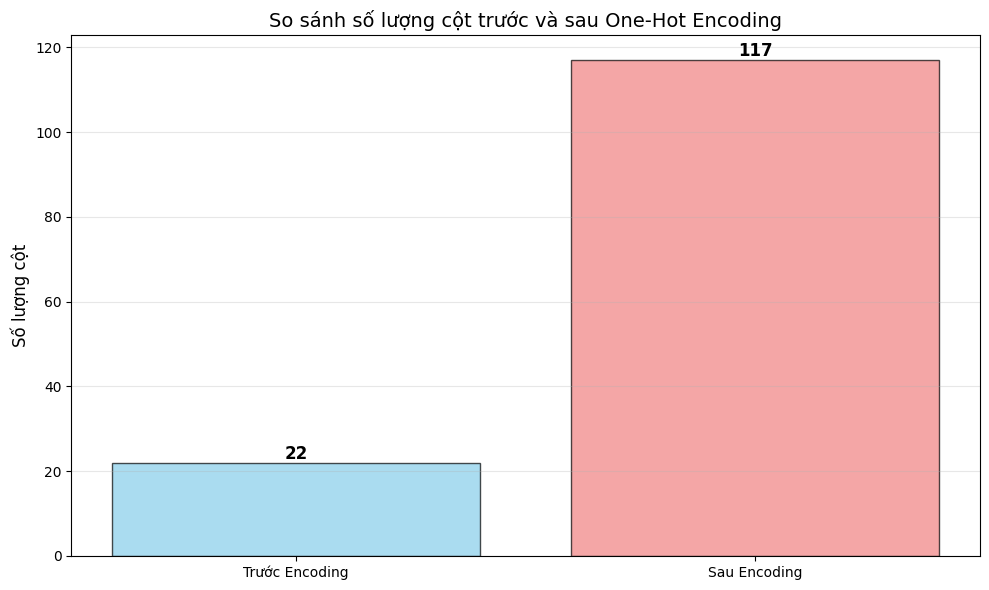


Giải thích: Mỗi giá trị unique trong categorical column được chuyển thành 1 cột binary.
Với 22 cột categorical ban đầu, sau encoding có 117 cột.


In [14]:
# Vẽ biểu đồ so sánh số lượng cột
plt.figure(figsize=(10, 6))
categories = ['Trước Encoding', 'Sau Encoding']
col_counts = [num_cols_before, num_cols_after]
colors = ['skyblue', 'lightcoral']
bars = plt.bar(categories, col_counts, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Số lượng cột', fontsize=12)
plt.title('So sánh số lượng cột trước và sau One-Hot Encoding', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị lên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nGiải thích: Mỗi giá trị unique trong categorical column được chuyển thành 1 cột binary.")
print(f"Với {num_cols_before} cột categorical ban đầu, sau encoding có {num_cols_after} cột.")

## Câu 6: Tách dữ liệu huấn luyện và kiểm thử

In [15]:
# Tách features về train và test như ban đầu
X_train = features[:train_size]
X_test = features[train_size:]

# Tách labels về train và test như ban đầu
y_train = labels[:train_size]
y_test = labels[train_size:]

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước y_test: {y_test.shape}")

print(f"\nPhân bố y_train:\n{y_train.value_counts()}")
print(f"\nPhân bố y_test:\n{y_test.value_counts()}")

Kích thước X_train: (5686, 117)
Kích thước X_test: (2438, 117)
Kích thước y_train: (5686,)
Kích thước y_test: (2438,)

Phân bố y_train:
class
e    2945
p    2741
Name: count, dtype: int64

Phân bố y_test:
class
e    1263
p    1175
Name: count, dtype: int64


## Câu 7: Xây dựng cây quyết định ID3 (criterion='entropy')

In [16]:
# Xây dựng mô hình cây ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

print("Mô hình cây ID3 đã được huấn luyện")
print(f"Độ sâu của cây: {id3_model.get_depth()}")
print(f"Số lượng lá: {id3_model.get_n_leaves()}")

Mô hình cây ID3 đã được huấn luyện
Độ sâu của cây: 6
Số lượng lá: 12


In [17]:
# Dự đoán trên tập kiểm thử
y_pred_id3 = id3_model.predict(X_test)

# Tính toán độ chính xác
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
print(f"Độ chính xác của mô hình ID3: {accuracy_id3:.4f}")

# In classification report
print("\nClassification Report (ID3):")
print(classification_report(y_test, y_pred_id3, target_names=['Edible', 'Poisonous']))

Độ chính xác của mô hình ID3: 1.0000

Classification Report (ID3):
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Ma trận nhầm lẫn (ID3):
[[1263    0]
 [   0 1175]]


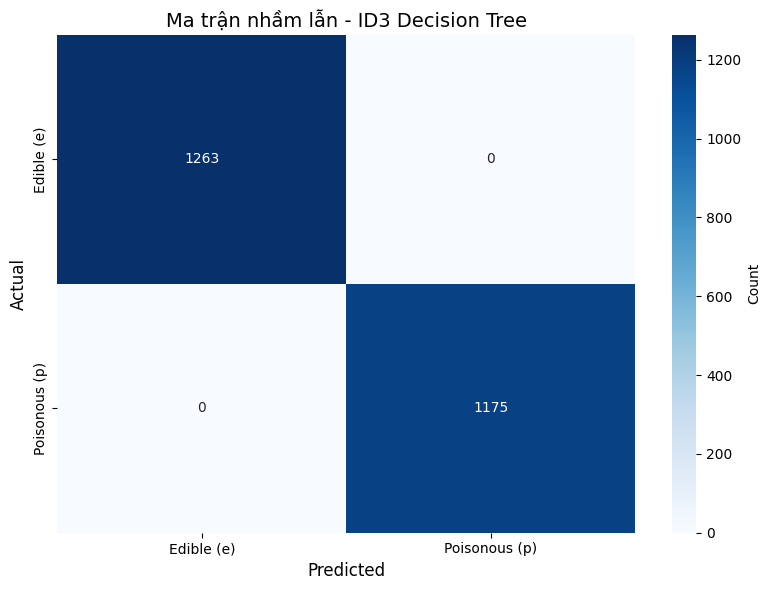

In [18]:
# Tính toán ma trận nhầm lẫn
cm_id3 = confusion_matrix(y_test, y_pred_id3)
print("Ma trận nhầm lẫn (ID3):")
print(cm_id3)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible (e)', 'Poisonous (p)'], 
            yticklabels=['Edible (e)', 'Poisonous (p)'],
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - ID3 Decision Tree', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

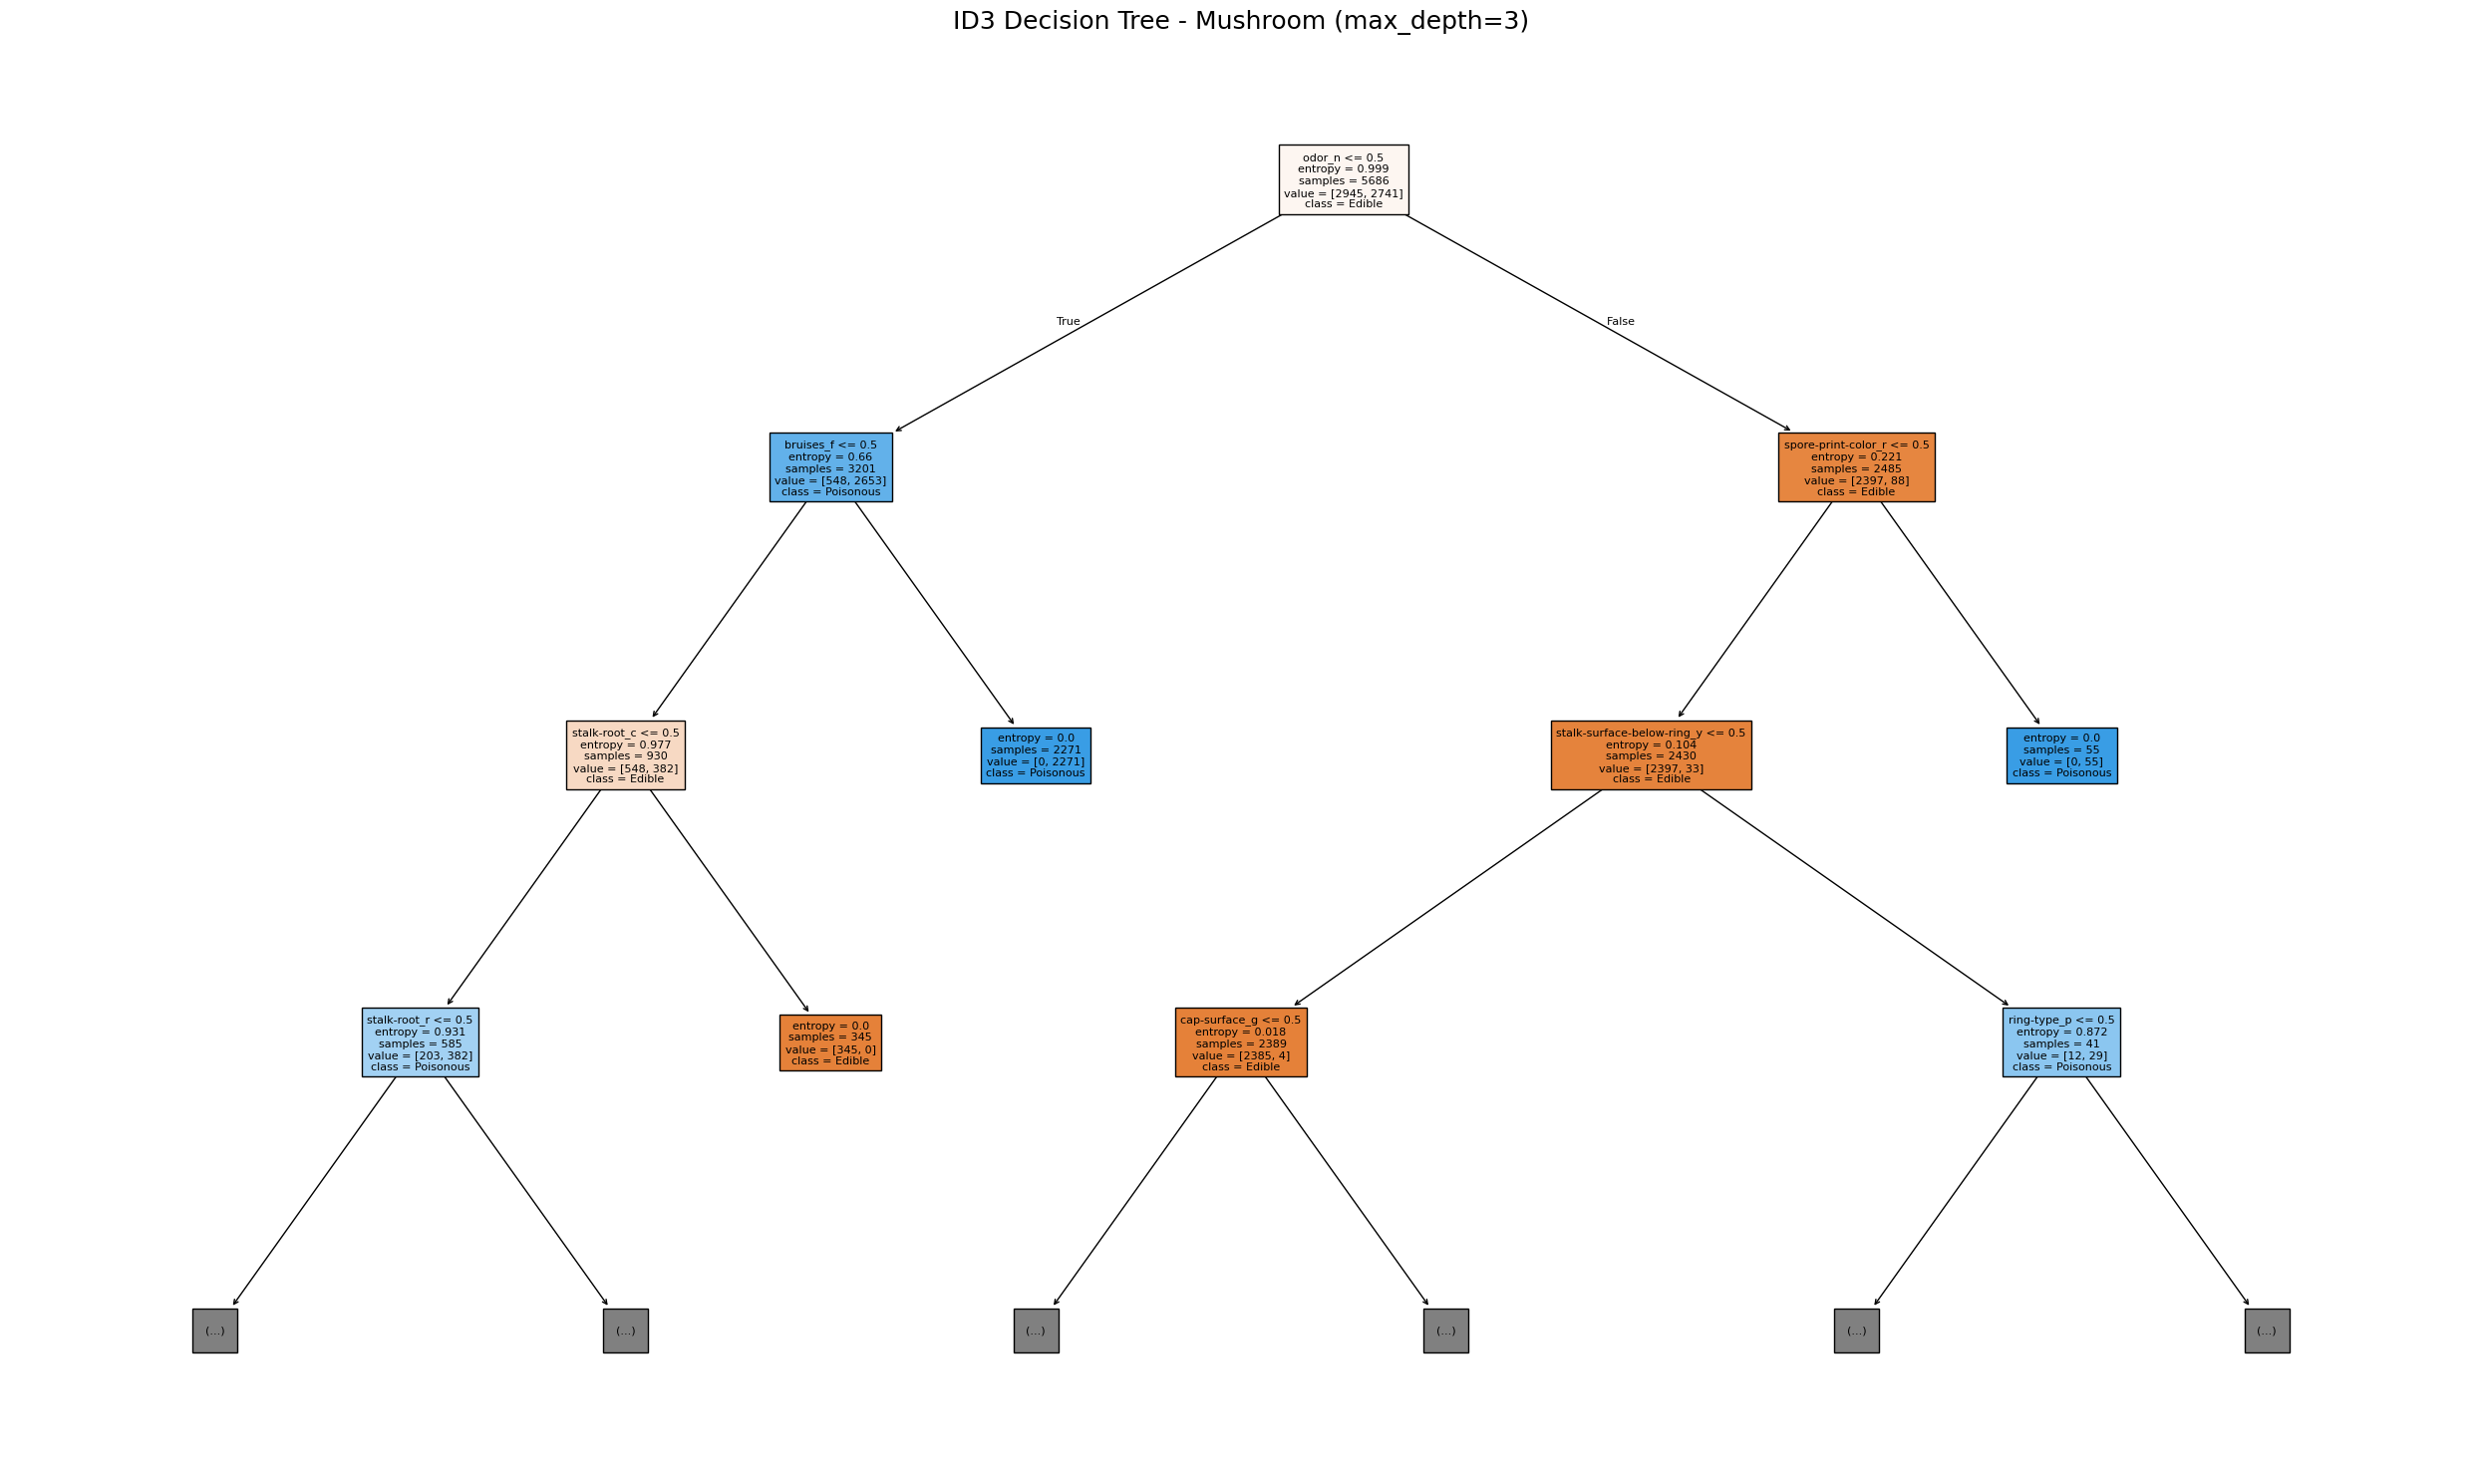

Đã lưu cây ID3 vào file 'mushroom_id3_decision_tree.png'


In [19]:
# Biểu diễn cây ID3 (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(25, 15))
tree.plot_tree(id3_model, 
               feature_names=X_train.columns, 
               class_names=['Edible', 'Poisonous'],
               filled=True, 
               max_depth=3,  # Giới hạn độ sâu hiển thị
               fontsize=8)
plt.title('ID3 Decision Tree - Mushroom (max_depth=3)', fontsize=18)
plt.tight_layout()
plt.savefig('mushroom_id3_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây ID3 vào file 'mushroom_id3_decision_tree.png'")

Top 15 thuộc tính quan trọng nhất (ID3):


,feature,importance
27,odor_n,0.531246
20,bruises_f,0.212216
53,stalk-root_c,0.064017
100,spore-print-color_r,0.052255
110,habitat_d,0.048047
55,stalk-root_r,0.047865
63,stalk-surface-below-ring_y,0.030550
94,ring-type_p,0.006295
7,cap-surface_g,0.005280
105,population_c,0.001504


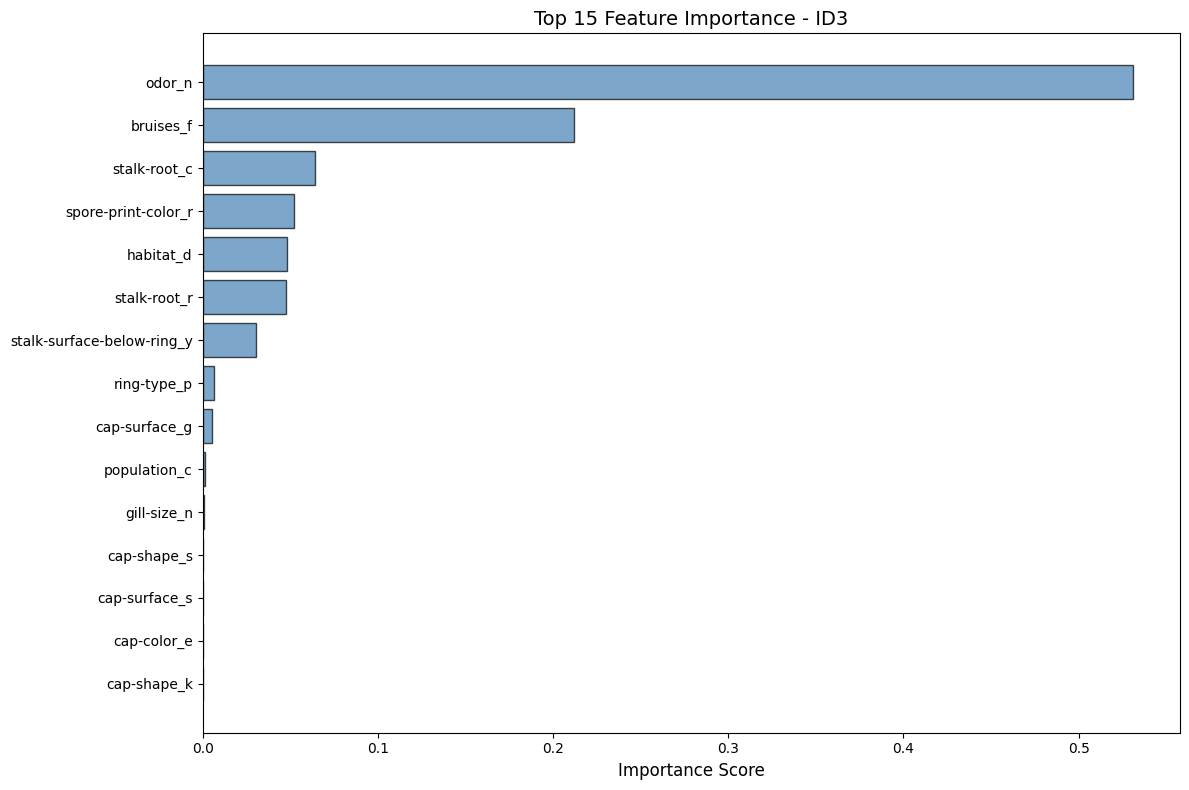

In [20]:
# Feature importance của ID3
feature_importance_id3 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': id3_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 thuộc tính quan trọng nhất (ID3):")
display(feature_importance_id3.head(15))

# Vẽ biểu đồ feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_id3.head(15)
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1],
         color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Feature Importance - ID3', fontsize=14)
plt.tight_layout()
plt.show()

## Câu 8: Xây dựng cây quyết định CART (criterion='gini')

In [21]:
# Xây dựng mô hình cây CART
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

print("Mô hình cây CART đã được huấn luyện")
print(f"Độ sâu của cây: {cart_model.get_depth()}")
print(f"Số lượng lá: {cart_model.get_n_leaves()}")

Mô hình cây CART đã được huấn luyện
Độ sâu của cây: 6
Số lượng lá: 13


In [22]:
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_model.predict(X_test)

# Tính toán độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"Độ chính xác của mô hình CART: {accuracy_cart:.4f}")

# In classification report
print("\nClassification Report (CART):")
print(classification_report(y_test, y_pred_cart, target_names=['Edible', 'Poisonous']))

Độ chính xác của mô hình CART: 1.0000

Classification Report (CART):
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Ma trận nhầm lẫn (CART):
[[1263    0]
 [   0 1175]]


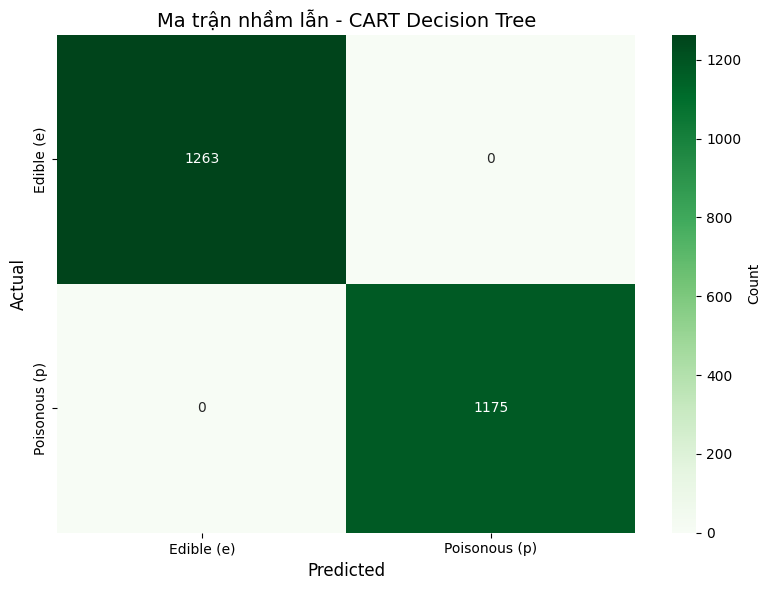

In [23]:
# Tính toán ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Ma trận nhầm lẫn (CART):")
print(cm_cart)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Edible (e)', 'Poisonous (p)'], 
            yticklabels=['Edible (e)', 'Poisonous (p)'],
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - CART Decision Tree', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

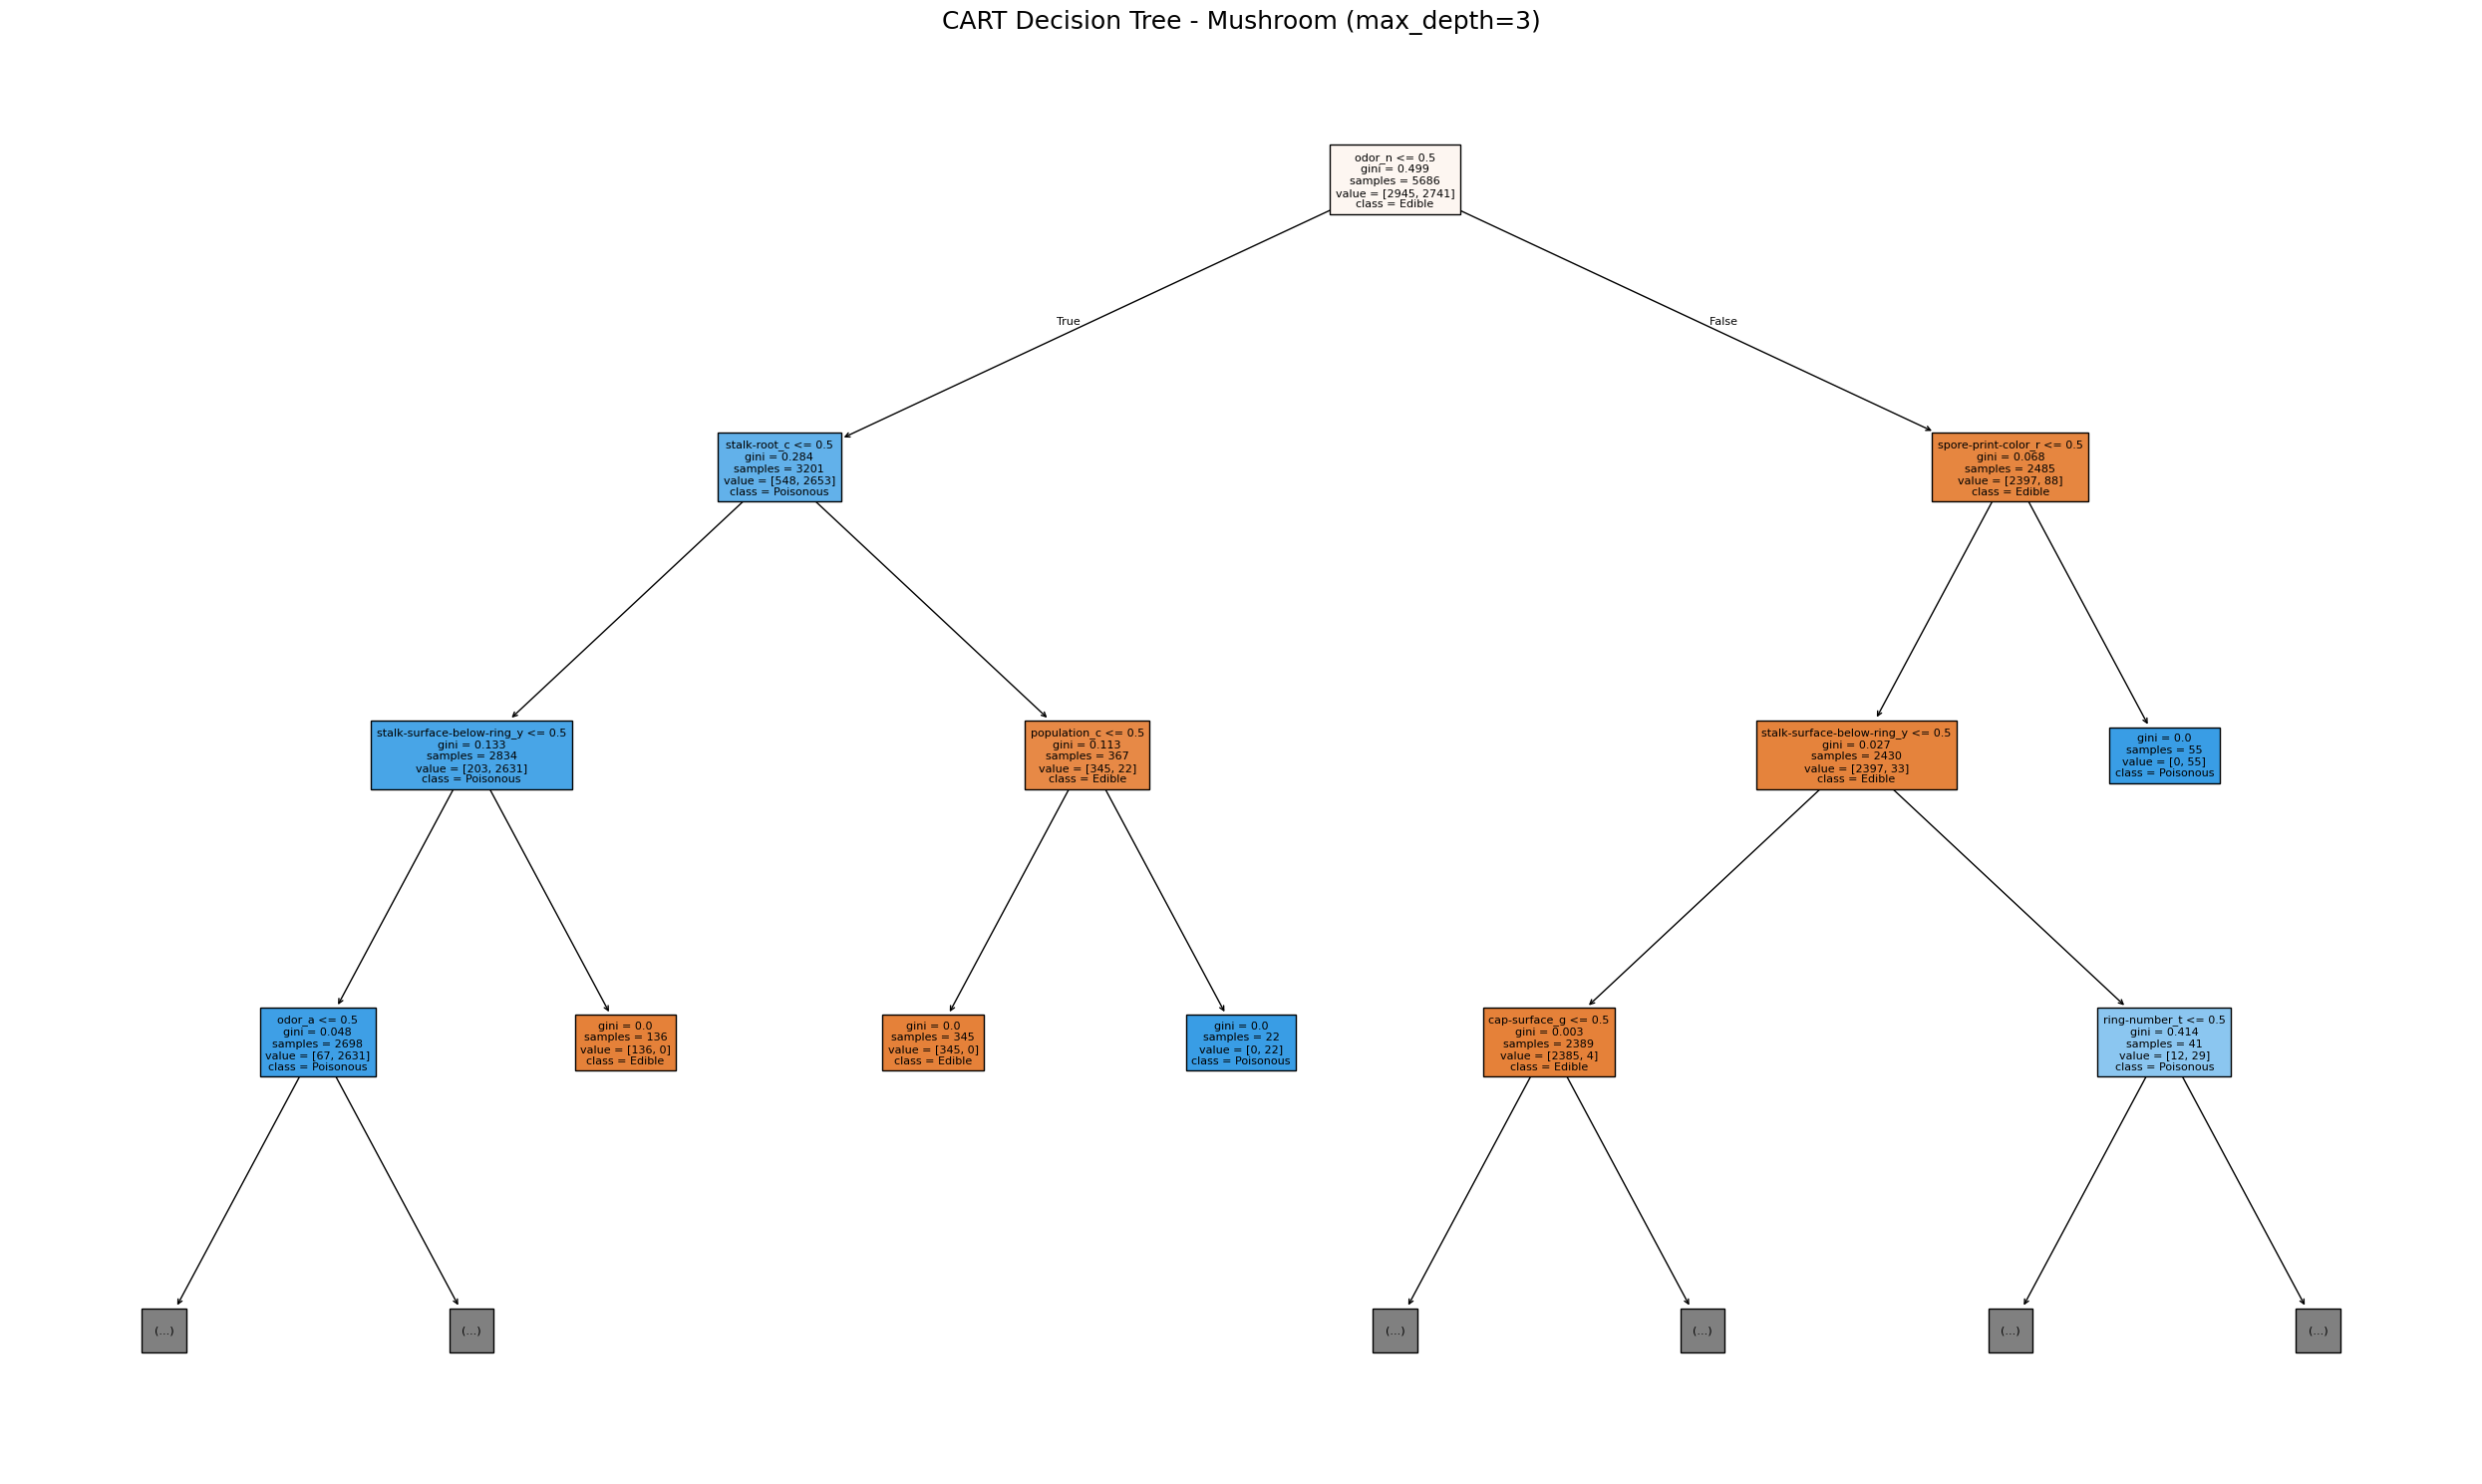

Đã lưu cây CART vào file 'mushroom_cart_decision_tree.png'


In [24]:
# Biểu diễn cây CART (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(25, 15))
tree.plot_tree(cart_model, 
               feature_names=X_train.columns, 
               class_names=['Edible', 'Poisonous'],
               filled=True, 
               max_depth=3,  # Giới hạn độ sâu hiển thị
               fontsize=8)
plt.title('CART Decision Tree - Mushroom (max_depth=3)', fontsize=18)
plt.tight_layout()
plt.savefig('mushroom_cart_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây CART vào file 'mushroom_cart_decision_tree.png'")

Top 15 thuộc tính quan trọng nhất (CART):


,feature,importance
27,odor_n,0.620286
53,stalk-root_c,0.172606
63,stalk-surface-below-ring_y,0.100864
100,spore-print-color_r,0.036862
22,odor_a,0.023065
25,odor_l,0.022957
105,population_c,0.014568
89,ring-number_t,0.005979
7,cap-surface_g,0.002109
21,bruises_t,0.000699


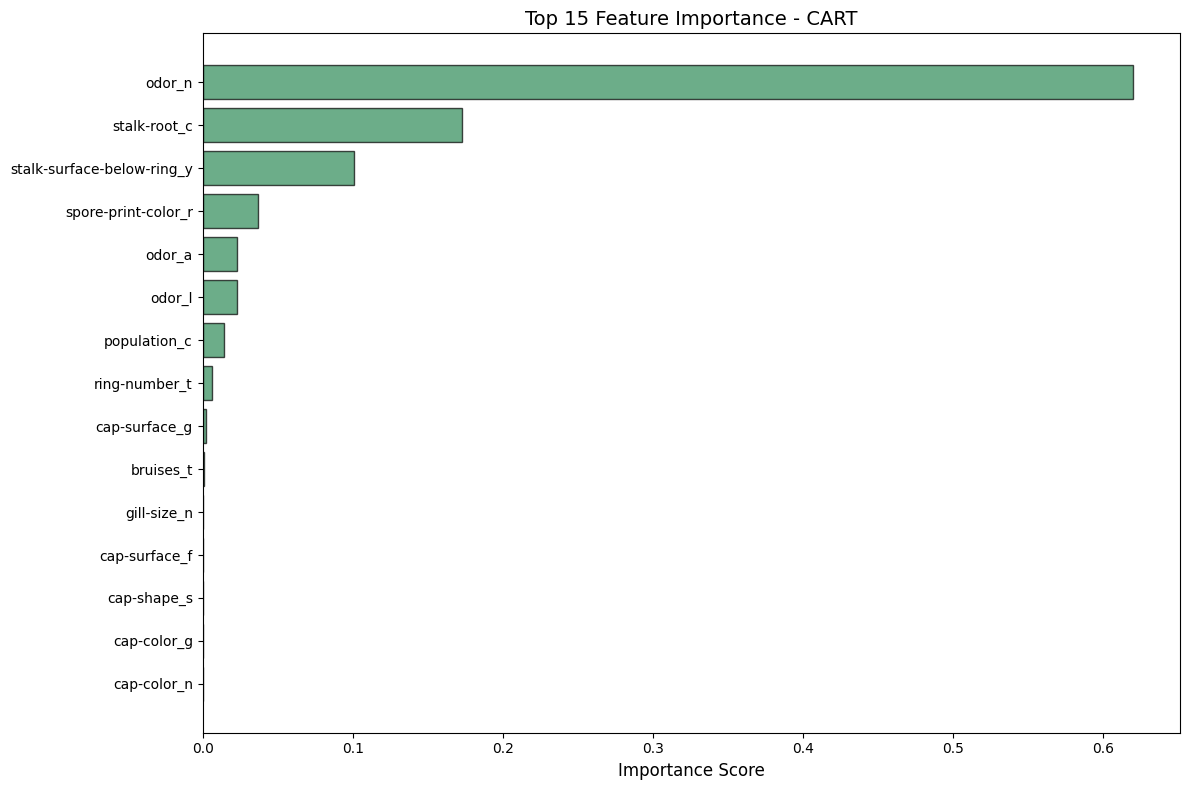

In [25]:
# Feature importance của CART
feature_importance_cart = pd.DataFrame({
    'feature': X_train.columns,
    'importance': cart_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 thuộc tính quan trọng nhất (CART):")
display(feature_importance_cart.head(15))

# Vẽ biểu đồ feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_cart.head(15)
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1],
         color='seagreen', alpha=0.7, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Feature Importance - CART', fontsize=14)
plt.tight_layout()
plt.show()

## Câu 9: Xây dựng mô hình Naïve Bayes

In [26]:
# Xây dựng mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("Mô hình Naïve Bayes đã được huấn luyện")

Mô hình Naïve Bayes đã được huấn luyện


In [27]:
# Dự đoán trên tập kiểm thử
y_pred_nb = nb_model.predict(X_test)

# Tính toán độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác của mô hình Naïve Bayes: {accuracy_nb:.4f}")

# In classification report
print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=['Edible', 'Poisonous']))

Độ chính xác của mô hình Naïve Bayes: 0.9512

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

      Edible       1.00      0.91      0.95      1263
   Poisonous       0.91      1.00      0.95      1175

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.96      0.95      0.95      2438



Ma trận nhầm lẫn (Naïve Bayes):
[[1146  117]
 [   2 1173]]


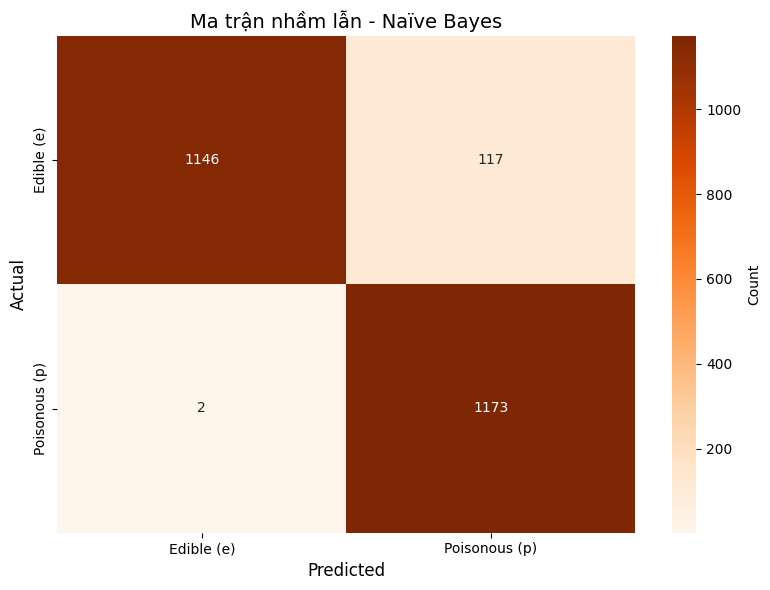

In [28]:
# Tính toán ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Ma trận nhầm lẫn (Naïve Bayes):")
print(cm_nb)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Edible (e)', 'Poisonous (p)'], 
            yticklabels=['Edible (e)', 'Poisonous (p)'],
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - Naïve Bayes', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

## Câu 10: So sánh kết quả các mô hình

In [29]:
# Tổng hợp kết quả
results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb],
    'Tree Depth': [id3_model.get_depth(), cart_model.get_depth(), 'N/A'],
    'Number of Leaves': [id3_model.get_n_leaves(), cart_model.get_n_leaves(), 'N/A']
})

print("="*80)
print("SO SÁNH KẾT QUẢ CÁC MÔ HÌNH - MUSHROOM CLASSIFICATION")
print("="*80)
display(results)
print("="*80)

SO SÁNH KẾT QUẢ CÁC MÔ HÌNH - MUSHROOM CLASSIFICATION


,Model,Accuracy,Tree Depth,Number of Leaves
0,ID3 (Entropy),1.000000,6,12
1,CART (Gini),1.000000,6,13
2,Naïve Bayes,0.951189,N/A,N/A


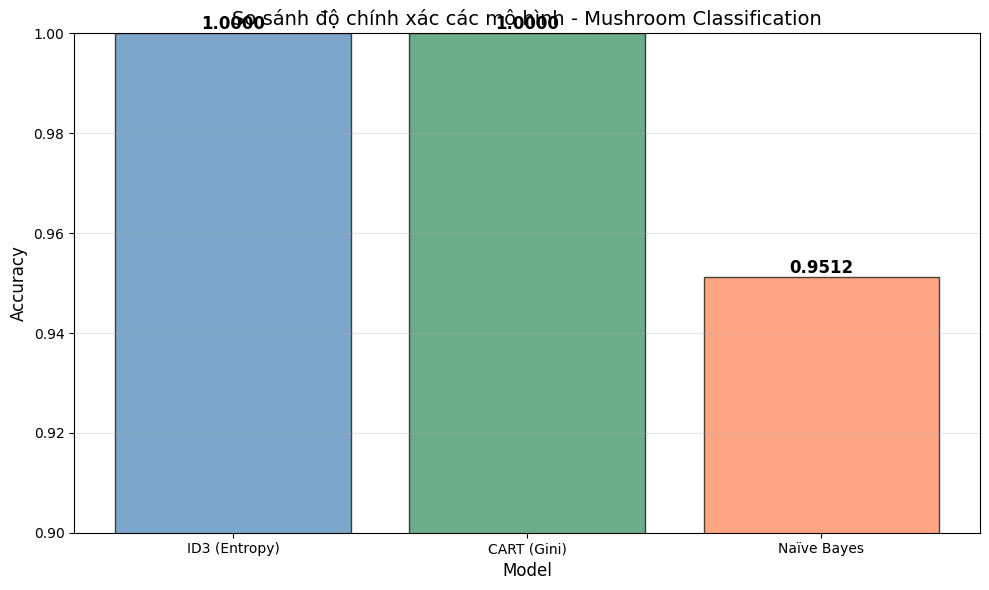

In [30]:
# Vẽ biểu đồ so sánh accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Model'], results['Accuracy'], 
               color=['steelblue', 'seagreen', 'coral'], alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('So sánh độ chính xác các mô hình - Mushroom Classification', fontsize=14)
plt.ylim([0.9, 1.0])  # Zoom vào vùng cao
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

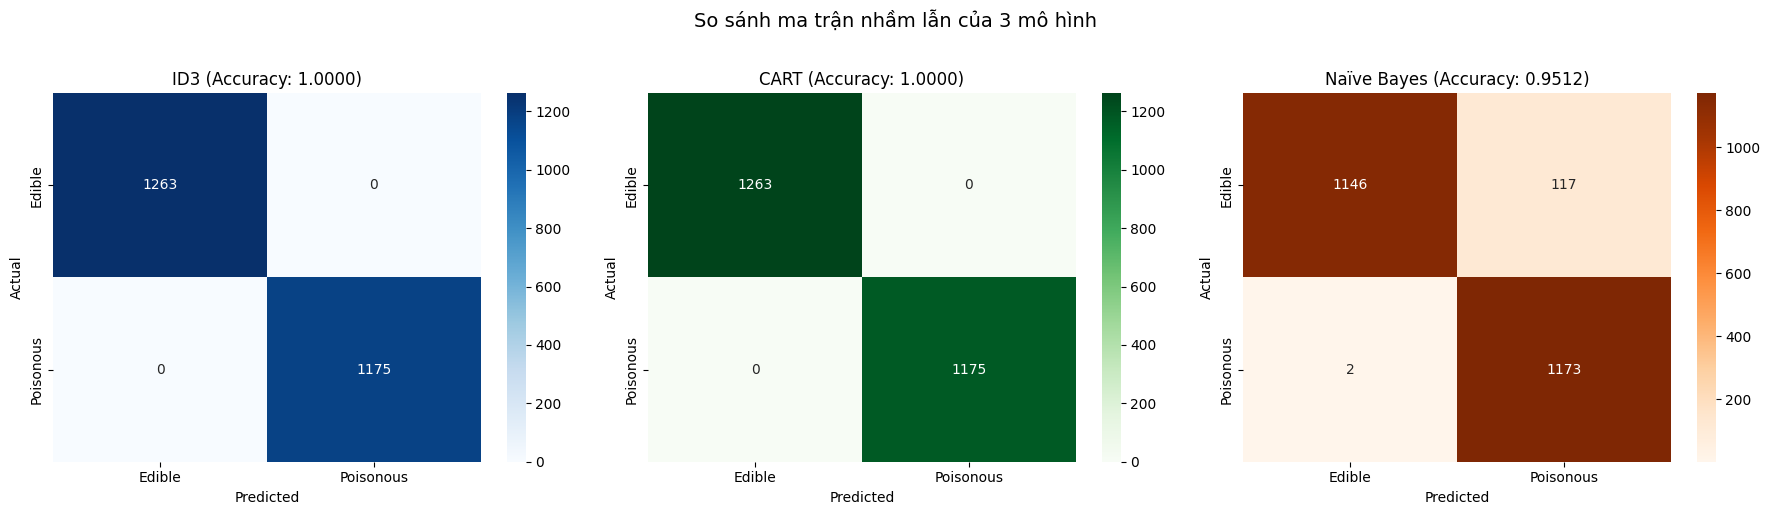

In [31]:
# So sánh ma trận nhầm lẫn của 3 mô hình
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ID3
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
axes[0].set_title(f'ID3 (Accuracy: {accuracy_id3:.4f})', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=10)
axes[0].set_xlabel('Predicted', fontsize=10)

# CART
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
axes[1].set_title(f'CART (Accuracy: {accuracy_cart:.4f})', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=10)
axes[1].set_xlabel('Predicted', fontsize=10)

# Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
axes[2].set_title(f'Naïve Bayes (Accuracy: {accuracy_nb:.4f})', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=10)
axes[2].set_xlabel('Predicted', fontsize=10)

plt.suptitle('So sánh ma trận nhầm lẫn của 3 mô hình', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


So sánh chi tiết các metrics (đối với class Poisonous):


,Model,Accuracy,Precision,Recall,F1-Score
0,ID3 (Entropy),1.000000,1.000000,1.000000,1.000000
1,CART (Gini),1.000000,1.000000,1.000000,1.000000
2,Naïve Bayes,0.951189,0.909302,0.998298,0.951724


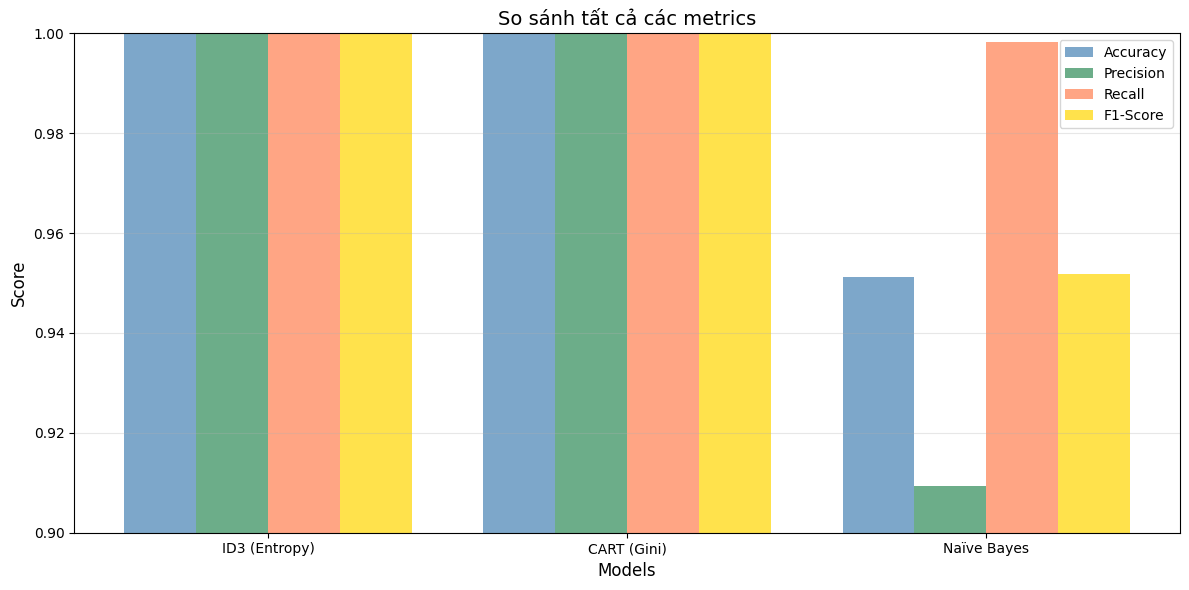

In [32]:
# Tính toán các metrics chi tiết
from sklearn.metrics import precision_score, recall_score, f1_score

# ID3
precision_id3 = precision_score(y_test, y_pred_id3, pos_label='p')
recall_id3 = recall_score(y_test, y_pred_id3, pos_label='p')
f1_id3 = f1_score(y_test, y_pred_id3, pos_label='p')

# CART
precision_cart = precision_score(y_test, y_pred_cart, pos_label='p')
recall_cart = recall_score(y_test, y_pred_cart, pos_label='p')
f1_cart = f1_score(y_test, y_pred_cart, pos_label='p')

# Naïve Bayes
precision_nb = precision_score(y_test, y_pred_nb, pos_label='p')
recall_nb = recall_score(y_test, y_pred_nb, pos_label='p')
f1_nb = f1_score(y_test, y_pred_nb, pos_label='p')

# Tạo bảng so sánh chi tiết
detailed_results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb],
    'Precision': [precision_id3, precision_cart, precision_nb],
    'Recall': [recall_id3, recall_cart, recall_nb],
    'F1-Score': [f1_id3, f1_cart, f1_nb]
})

print("\nSo sánh chi tiết các metrics (đối với class Poisonous):")
display(detailed_results)

# Vẽ biểu đồ so sánh tất cả metrics
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(detailed_results['Model']))
width = 0.2

ax.bar(x - 1.5*width, detailed_results['Accuracy'], width, label='Accuracy', color='steelblue', alpha=0.7)
ax.bar(x - 0.5*width, detailed_results['Precision'], width, label='Precision', color='seagreen', alpha=0.7)
ax.bar(x + 0.5*width, detailed_results['Recall'], width, label='Recall', color='coral', alpha=0.7)
ax.bar(x + 1.5*width, detailed_results['F1-Score'], width, label='F1-Score', color='gold', alpha=0.7)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('So sánh tất cả các metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(detailed_results['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.9, 1.0])

plt.tight_layout()
plt.show()